## Advanced Uses of SHAP Values

In [1]:
# Load soccer/footbal data
import pandas as pd
data = pd.read_csv('../../../data/FIFA 2018 Statistics.csv')
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [2]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
y = (data['Man of the Match'] == "Yes")
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
X = data[feature_names]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)
my_model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035),
 DecisionTreeClassifier(max_features='sqrt', random_state=626610453),
 DecisionTreeClassifier(max_features='sqrt', random_state=1650906866),
 DecisionTreeClassifier(max_features='sqrt', random_state=1879422756),
 DecisionTreeClassifier(max_features='sqrt', random_state=1277901399),
 DecisionTree

In [4]:
import shap
explanier = shap.TreeExplainer(my_model)

/Users/asaucedo/workspaces/python3/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# transpose shap_values (from (32, 18, 2) to (2, 18))
import json
shap_values = explanier.shap_values(valid_X)
shap_values_transpose = shap_values[0].transpose()
json.dumps(shap_values.tolist())

'[[[0.21404534952571097, -0.21404534952571097], [-0.02115010037601046, 0.021150100376010467], [0.04667217514405301, -0.04667217514405307], [0.022847567703565934, -0.02284756770356596], [-0.010874882426593204, 0.010874882426593206], [-0.01920507927340075, 0.01920507927340075], [-0.0034666672823842025, 0.003466667282384197], [-0.000441675941266117, 0.0004416759412661209], [0.03204762493223301, -0.032047624932233065], [0.0028942318911232604, -0.0028942318911232673], [-0.10074219398030042, 0.10074219398030043], [-0.027788117471293727, 0.02778811747129372], [-0.014088240858274738, 0.014088240858274734], [-0.0025532302639426642, 0.002553230263942666], [0.0015261693414308313, -0.001526169341430832], [-4.846915465747705e-05, 4.8469154657477e-05], [-0.00040085271584467546, 0.00040085271584467574], [0.0019763912058513187, -0.001976391205851318]], [[-0.08833914599589794, 0.08833914599589798], [-0.020011690511853173, 0.020011690511853173], [-0.0027617364222829424, 0.0027617364222829524], [-0.01325

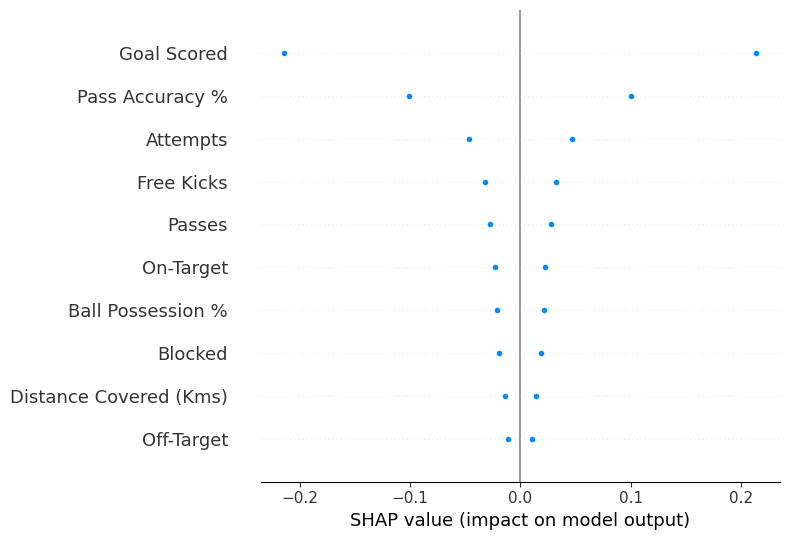

In [6]:
# plot summary of shap_values
shap.summary_plot(shap_values=shap_values_transpose, feature_names=feature_names, max_display=10)

In [7]:
# Recalculate shap_values for all the data
shap_values_all = explanier.shap_values(X)

In [88]:
X.shape, shap_values_all.shape, len(feature_names)

((128, 18), (128, 18, 2), 18)

In [8]:
# Dependency
shap.dependence_plot('Ball Possession %', shap_values_all[1], X)

IndexError: index 18 is out of bounds for axis 0 with size 18